In [1]:
import os

In [2]:
import pandas as pd 
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [88]:
from wordcloud import WordCloud
from collections import Counter

# open data
---

In [4]:
os.listdir("./dataSet")

['genome_scores.csv',
 'genome_tags.csv',
 'link.csv',
 'movie.csv',
 'MovieLens 20M dataset.zip',
 'rating.csv',
 'tag.csv']

## movie 

In [5]:
data_movie = pd.read_csv("./dataSet/movie.csv")

In [6]:
data_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## rating

In [7]:
data_rating = pd.read_csv("./dataSet/rating.csv")

In [8]:
data_rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


user가 너무 많으므로 1000명으로 줄임 

In [9]:
data_rating_small = data_rating[data_rating['userId']<=1000]

In [10]:
data_rating_small

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
150624,1000,88125,5.0,2012-01-03 00:53:12
150625,1000,88140,4.0,2012-01-03 00:53:51
150626,1000,88744,5.0,2012-01-03 00:53:47
150627,1000,90603,4.5,2012-01-03 00:53:28


---

# making rating matrix 

In [11]:
merges = pd.merge(data_rating_small,data_movie,on="movieId",how="left")

In [12]:
merges

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
150624,1000,88125,5.0,2012-01-03 00:53:12,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
150625,1000,88140,4.0,2012-01-03 00:53:51,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War
150626,1000,88744,5.0,2012-01-03 00:53:47,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
150627,1000,90603,4.5,2012-01-03 00:53:28,Batman: Year One (2011),Action|Animation|Crime


In [13]:
merges.drop("timestamp",axis=1,inplace=True)

In [14]:
merges

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
150624,1000,88125,5.0,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
150625,1000,88140,4.0,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War
150626,1000,88744,5.0,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
150627,1000,90603,4.5,Batman: Year One (2011),Action|Animation|Crime


In [15]:
rating_matrix= merges.pivot_table('rating', index = 'title', columns='userId')

In [16]:
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rating_matrix = rating_matrix.fillna(0)

In [18]:
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## item based

In [19]:
'''
function : collaborative Filtering by item
input
    -item(str) : item name to be compared (movie name)
    -N(int) : default 10
              ordering nubmer
'''

def itembasedResult(item,N=10):
    #similarity
    rm = rating_matrix.copy(deep=True)
    sim_item = cosine_similarity(rm)

    #order
    title = rm.index.to_numpy()

    title_index = np.where(title==item)[0][0]

    ar = sim_item[title_index]

    order_index = np.argsort(-ar)

    result = []
    cnt = 1
    for i in order_index:
        if(cnt<=N):
            print(cnt,end="\t")
            print(i,end="\t")
            print(sim_item[title_index][i],end="\t")
            print(title[i])
            result.append([i,title[i]])
            cnt+=1
    #return result


In [20]:
itembasedResult("Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979)",50)

1	1628	1.0	Cat o' Nine Tails, The (Gatto a nove code, Il) (1971)
2	8936	1.0	Trip, The (1967)
3	1010	1.0	Beyond Re-Animator (2003)
4	8010	1.0	Society (1989)
5	8021	1.0	Soldier, The (1982)
6	2204	1.0	Danger: Diabolik (Diabolik) (1968)
7	966	1.0	Benny's Video (1992)
8	9557	1.0	Witchfinder General (Conquerer Worm, The) (1968)
9	2142	1.0	Cul-de-sac (1966)
10	9004	1.0	Twelve and Holding (2005)
11	1431	1.0	Brown Bunny, The (2003)
12	9029	1.0	Two Evil Eyes (1990)
13	2088	1.0	Crimewave (1985)
14	867	1.0	Bay of Blood (a.k.a. Twitch of the Death Nerve) (Reazione a catena) (1971)
15	3379	1.0	From Beyond (1986)
16	3405	1.0	Full Tilt Boogie (1997)
17	8594	1.0	Tess (1979)
18	4736	1.0	Johnson Family Vacation (2004)
19	8592	1.0	Terror, The (1963)
20	2032	1.0	Countess Dracula (1972)
21	8590	1.0	Terror Train (1980)
22	1471	1.0	Burial Ground (a.k.a. Zombie Horror) (a.k.a. Zombie 3) (Notti del Terrore, Le) (1981)
23	1018	1.0	Beyond, The (E tu vivrai nel terrore - L'aldilà) (1981)
24	7028	1.0	Pure Formality

## user based 

In [134]:
'''
function : collaborative Filtering by user
input
    -personId(INT) : user to be compared (userId)
'''

#- user id별 영화 추천 ordering list
def userbasedResult(personId):
    rm = rating_matrix.copy(deep=True)
    #cos sim  by user
    sim_user = cosine_similarity(rm.T)
    
    #rating_matrix with weight​ (ppt 방식)
        #- 처리 편하게 하기위해서 (x축 -> id , y축 -> 영화 ) === ppt 그림 형식
    rating_np = rm.to_numpy()
    rating_np = rating_np.T

    for i in range(len(sim_user)):
        for j in range(len(rating_np[0])):
            rating_np[i][j] = rating_np[i][j]*sim_user[personId-1][i]
    #다시 제자리로
    rating_np = rating_np.T
    person_rating = pd.DataFrame(rating_np)
    person_rating.index = rating_matrix.index
    person_rating.columns = rating_matrix.columns

    #추천 결과
    movie_rating = pd.DataFrame(person_rating.sum(axis=1))
    movie_rating.columns = [personId]
    movie_rating = movie_rating.sort_values(by=[20],ascending=False)

    #시각화 결과(user rating)
    user_title = pd.DataFrame(rm[:][20][rm[:][20] > 0].index)
    user_merge = pd.merge(user_title,data_movie,on="title",how="left")
    user_tag = []
    for i in range(len(user_merge["genres"])):
        user_tag= user_tag+(user_merge["genres"][i].split("|"))
    user_count = Counter(user_tag)
    wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(user_count)
    plt.figure()
    plt.title("user tag")
    plt.imshow(gen)
    plt.axis('off')
    plt.savefig("result/user_tag.jpg")
    #시각화 결과(recommendation)
    result_movie = movie_rating[movie_rating  > 50].dropna(axis=0)
    result_merge = pd.merge(result_movie,data_movie,on="title",how="left")

    result_tag = []
    for i in range(len(user_merge["genres"])):
        result_tag= result_tag+(result_merge["genres"][i].split("|"))
    result_count = Counter(result_tag)
    wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(result_count)
    plt.figure()
    plt.title("recommendation tag")
    plt.imshow(gen)
    plt.axis('off')
    plt.savefig("result/result_tag.jpg")

    return movie_rating

    

,20
title,
Pulp Fiction (1994),164.171956
"Matrix, The (1999)",157.086046
"Shawshank Redemption, The (1994)",146.578877
"Silence of the Lambs, The (1991)",142.185982
Forrest Gump (1994),137.926438
...,...
Leap Year (2010),0.000000
"Living Dead Girl, The (Morte Vivante, La) (1982)",0.000000
All Quiet on the Western Front (1979),0.000000


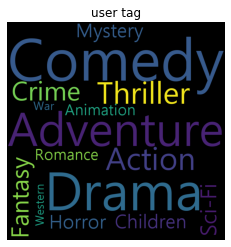

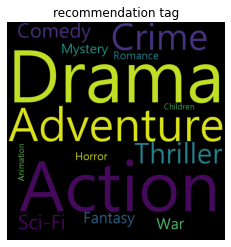

In [135]:
userbasedResult(20)